In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/FND using Unsupervised Learning /data/politifact/data-20-dec/complete_processed_dataset.csv')

In [4]:
data.head()

,text,type,split
0,hempstead new york cnn republican presidential...,1,test
1,mitt romney came to coal country on aug standi...,1,test
2,contact the cq hotline at or,1,test
3,attorney general jeff sessions today issued th...,0,test
4,the recently installed ceo of donald trumps pr...,0,test


In [5]:
data.shape

(824, 3)

In [12]:
training_data = data[data['type']==1]
mix_data = data

In [13]:
print(training_data)
print(mix_data)

                                                  text  type split
0    hempstead new york cnn republican presidential...     1  test
1    mitt romney came to coal country on aug standi...     1  test
2                         contact the cq hotline at or     1  test
5                                                  NaN     1  test
6    the global electricity sector is undergoing it...     1  test
..                                                 ...   ...   ...
811  about the dataset the political tv ad archive ...     1   val
812  the third mccainobama presidential debate sens...     1   val
818  to fix this upgrade to the lastest version of ...     1   val
819  apparently back when president barack obama wo...     1   val
822  please use a supported version for the best ms...     1   val

[442 rows x 3 columns]
                                                  text  type split
0    hempstead new york cnn republican presidential...     1  test
1    mitt romney came to coal country 

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def format_data(data, max_features, maxlen, tokenizer=None, shuffle=False):
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    
    data['text'] = data['text'].apply(lambda x: str(x).lower()) #converting the text to lowercase 

    X = data['text']
    Y = data['type'].values # 0: Real; 1: Fake

    if not tokenizer:
        filters = "\"#$%&()*+./<=>@[\\]^_`{|}~\t\n"
        tokenizer = Tokenizer(num_words=max_features, filters=filters)  #tokenizing of text
        tokenizer.fit_on_texts(list(X))

    X = tokenizer.texts_to_sequences(X)  #converting text to sequence
    #print(X)
    X = pad_sequences(X, maxlen=maxlen)  #sequence converted into matrix 

    return X, Y, tokenizer

In [15]:
max_features, max_len = 5000, 25
X, Y, tokenizer = format_data(training_data, max_features, max_len, shuffle=True)
X_eval, Y_eval, tokenizer = format_data(mix_data, max_features, max_len, tokenizer=tokenizer)

In [16]:
print(X)
print(Y)
print(X_eval)
print(Y_eval)

[[  30   57  172 ...   14 1198   75]
 [ 100    2 1063 ...  634    4 2557]
 [   3 4423   11 ... 4424   42 4425]
 ...
 [   0    0    0 ...  976   32   42]
 [4312 3245   33 ...    4    1 4811]
 [   1   57  196 ...  524 2033  534]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1

In [18]:
from keras.layers import Input, Dense, Bidirectional, GRU, Embedding, Dropout, LSTM, RepeatVector, TimeDistributed
from keras.layers import concatenate,  GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model, Sequential
from keras import regularizers
from tensorflow.keras.optimizers import Adam
epochs=20
# timesteps = 10
n_features = 25
# training_data = training_data.reshape(309130, n_features)
model = Sequential()
model.add(Dense(128, input_shape=(n_features,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_features, activation='relu'))
#print(model.summary())
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# model.build()
# print(model.summary())
model.fit(X, X, validation_split=0.1,epochs=epochs, batch_size = 64, verbose=1)
# model.save_weights('model{}.h5'.format(epochs)) 

Epoch 1/20
7/7 [==============================] - 1s 90ms/step - loss: 1141332.2500 - accuracy: 0.0831 - val_loss: 900258.6875 - val_accuracy: 0.0889
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 1010453.9375 - accuracy: 0.1461 - val_loss: 839039.1250 - val_accuracy: 0.2000
Epoch 3/20
7/7 [==============================] - 0s 12ms/step - loss: 935430.6250 - accuracy: 0.2091 - val_loss: 785229.7500 - val_accuracy: 0.3111
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 871090.9375 - accuracy: 0.3249 - val_loss: 709605.7500 - val_accuracy: 0.3556
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 789118.0625 - accuracy: 0.3552 - val_loss: 652926.7500 - val_accuracy: 0.4222
Epoch 6/20
7/7 [==============================] - 0s 14ms/step - loss: 712916.3125 - accuracy: 0.4005 - val_loss: 590197.5000 - val_accuracy: 0.4889
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 636078.6250 - accuracy: 0.4408 - 

In [19]:
predictions = model.predict(X, batch_size=64, verbose=0)
print(predictions)

[[   0.         35.0815      0.       ...   59.470753 1147.0924
     0.      ]
 [ 132.29625     0.         83.66797  ...  697.914       0.
  2597.9497  ]
 [   0.       3649.5835      0.       ... 3927.9624      0.
  4490.3687  ]
 ...
 [   0.          0.          0.       ...  893.81964     0.
    44.16755 ]
 [3101.6248   1758.5253   1056.4733   ...  458.24478     0.
  5340.899   ]
 [   0.         78.99094     0.       ...  370.70822  2076.0952
   976.42816 ]]


In [20]:
mse = np.mean(np.power(predictions-X,2),axis=1)
print(mse)

[   6901.12620391  139795.78786584  170838.38493652    9737.77196186
  223016.27270092   90982.72765788   82820.48865991    8818.77767137
   20624.66467347   80384.10339406   85055.45806285   25383.7898968
   79130.12839499   77165.6570605    67180.06021291  268056.12765159
   99919.53586272   65419.10466813   91518.60250292   33267.48328675
   83196.66370498  154446.73207865  653086.76125871   28320.19180678
    6007.5053323   121666.10910322   85891.56575129  144828.84855456
  184968.26617747    1971.1832252    41879.18555986   80492.22055354
   69232.28256943    5361.9322456   554755.48637558  303885.99273939
 1002575.68259396  116290.29607046    1971.1832252   161246.94181303
   59587.43639089  190191.2346611     6007.5053323    77231.86142072
  231385.75805956   49996.90411364   59587.43639089    2600.21388396
  990455.32617044  913309.61535856 1098538.10489706  111508.74656131
   21460.68291312  336605.20463997   27667.38970848  149754.07943278
    6007.5053323    53615.22073383 

In [22]:
import numpy as np, scipy.stats as st

interval_95 = st.t.interval(0.50, len(mse)-1, loc=np.mean(mse), scale=st.sem(mse))
print(interval_95)

(172883.0833493272, 189274.10635505465)


In [23]:
mix_predictions = model.predict(X_eval, batch_size=64, verbose=0)
print(mix_predictions)

[[ 117.5426     16.604223    0.       ...   69.7713    358.3427
     0.      ]
 [   0.         78.99094     0.       ...  370.70822  2076.0952
   976.42816 ]
 [   0.          0.          0.       ...  893.81964     0.
    44.16755 ]
 ...
 [   0.          0.          0.       ... 1069.5084     41.31501
  1426.6365  ]
 [   0.          0.          0.       ...  217.67     1290.7202
   510.219   ]
 [   0.          0.          0.       ...  149.68898   308.5948
     0.      ]]


In [24]:
mix_mse = np.mean(np.power(mix_predictions-X_eval,2),axis=1)
print(mix_mse)

[3.47185409e+04 8.59728034e+04 1.97118323e+03 1.27282751e+05
 3.02003839e+05 5.36193225e+03 2.16442809e+05 2.49698351e+05
 1.03118137e+05 9.04246123e+04 4.25389012e+04 1.39636877e+05
 4.63417515e+05 2.69252588e+05 2.86348028e+04 1.01271716e+04
 2.56173051e+04 2.27632683e+05 3.23421285e+04 4.48977875e+04
 9.51940512e+03 2.73423591e+04 1.60539325e+05 2.06246647e+04
 4.45203522e+04 1.17148742e+05 1.97118323e+03 2.07735107e+05
 5.36152207e+04 4.78966576e+04 9.51940512e+03 8.73586293e+05
 8.09840672e+05 7.68628480e+05 4.77079507e+05 9.51940512e+03
 5.01224658e+04 1.66044789e+05 5.36193225e+03 5.80285695e+04
 4.43688870e+04 3.84460664e+04 6.29878156e+04 8.22825413e+04
 8.06643596e+05 4.45472239e+04 1.08748682e+06 9.10646947e+05
 6.00750533e+03 2.17762644e+05 2.43016504e+05 4.26749768e+04
 6.21635641e+04 1.00869195e+05 4.37998063e+04 1.01496539e+05
 4.97062894e+05 9.51940512e+03 2.40454460e+05 3.05994244e+04
 2.70975367e+05 8.04922206e+04 7.72620914e+05 1.30789372e+05
 2.01308048e+05 7.467436

In [25]:
pred_label = []
for val in mix_mse:
  if(val > interval_95[1]):
      pred_label.append(0)
  
  else:
      pred_label.append(1)

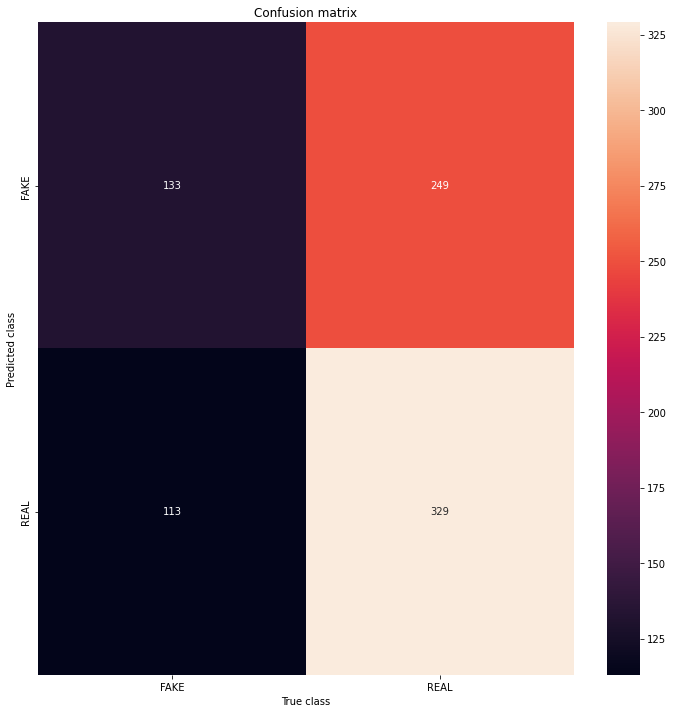

[[133 249]
 [113 329]]
0.5606796116504854


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
LABELS = ['FAKE', 'REAL']
# errors = error_df.reconstruction_error.values
# y_pred = [1 if e > threshold else 0 for e in errors] # final predictions
conf_matrix = confusion_matrix(mix_label, pred_label)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('Predicted class')
plt.xlabel('True class')
plt.show()
print(conf_matrix)
accuracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print(accuracy)

In [31]:
import numpy as geek
  
arr1 = geek.array([[2, 4], [6, 8]])
arr2 = geek.array([[3, 5], [7, 9]])
  
gfg = geek.concatenate((arr1, arr2), axis = 1)
  
print (gfg)

[[2 4 3 5]
 [6 8 7 9]]


In [ ]:
eval_data=data[data['split']=='test']   #taken only those data points which are for testing


In [ ]:
eval_data.head()

,text,type,split
0,hempstead new york cnn republican presidential...,1,test
1,mitt romney came to coal country on aug standi...,1,test
2,contact the cq hotline at or,1,test
3,attorney general jeff sessions today issued th...,0,test
4,the recently installed ceo of donald trumps pr...,0,test


In [ ]:
type(eval_data)

pandas.core.frame.DataFrame

In [ ]:
eval_data = eval_data.drop(['split'], axis = 1)   #removing the column named split

In [ ]:
eval_data.head()

,text,type
0,hempstead new york cnn republican presidential...,1
1,mitt romney came to coal country on aug standi...,1
2,contact the cq hotline at or,1
3,attorney general jeff sessions today issued th...,0
4,the recently installed ceo of donald trumps pr...,0


Training dataset - We are feeding real news

In [ ]:
data=data[data['split'].isin(['train','val'])] #taking those rows marked for training and validation.
data=data.reset_index(drop=True)
data.head()

,text,type,split
0,one of six children and the only daughter nanc...,0,train
1,president bush went to a muslim community cent...,1,train
2,community blogs post from sam grahamfelsen s b...,1,train
3,congressional quarterly has studied the voting...,1,train
4,the kaiser family foundations updated version ...,1,train


In [ ]:
data.shape

(741, 3)

In [ ]:
#real: 0, fake : 1
#train_data=data[data['type']==1].reset_index(drop=True)     #taking those which are of type 1
train_data=data[data['type']==0].reset_index(drop=True)     #taking those which are of type 0


In [ ]:
train_data = train_data.drop(['split'], axis = 1)

In [ ]:
train_data.head()

,text,type
0,one of six children and the only daughter nanc...,0
1,about trendolizer trendolizer patent pending a...,0
2,david hogg a senior at marjory stoneman dougla...,0
3,fox news host shepard smith slammed what he ca...,0
4,by am conservative post author fareed zakaria ...,0


In [ ]:
train_data.shape

(344, 2)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def format_data(data, max_features, maxlen, tokenizer=None, shuffle=False):
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    
    data['text'] = data['text'].apply(lambda x: str(x).lower()) #converting the text to lowercase 

    X = data['text'] 
    Y = data['type'].values # 0: Real; 1: Fake

    if not tokenizer:
        filters = "\"#$%&()*+./<=>@[\\]^_`{|}~\t\n"
        tokenizer = Tokenizer(num_words=max_features, filters=filters)  #tokenizing of text
        tokenizer.fit_on_texts(list(X))

    X = tokenizer.texts_to_sequences(X)  #converting text to sequence
    #print(X)
    X = pad_sequences(X, maxlen=maxlen)  #sequence converted into matrix 

    return X, Y, tokenizer

The `max_features` and `max_len` variables denote the length of each vector and the vocabulary length.

In [ ]:
max_features, max_len = 5000, 25
X, Y, tokenizer = format_data(train_data, max_features, max_len, shuffle=True)
X_eval, Y_eval, tokenizer = format_data(eval_data, max_features, max_len, tokenizer=tokenizer)

In [ ]:
X.shape

(344, 25)

In [ ]:
print(X)

[[   0    0    0 ...    9  424  212]
 [2897 2898  213 ... 2901   78  472]
 [   1  188    3 ...   64    1  663]
 ...
 [2661   12 1766 ...    1 2869  901]
 [  11  919    7 ...    6  105   80]
 [   0    0    0 ...   20    9  671]]


In [ ]:
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18912 sha256=b6bf0ecf8ed56350a5b84902b43830294de024a375d312c9c3d0e1694be01c34
  Stored in directory: /root/.cache/pip/wheels/95/b1/a8/5ee00cc137940b2f6fa198212e8f45d813d0e0d9c3a04035a3
Successfully built keras-self-attention


In [ ]:
from keras.layers import Input, Dense, Bidirectional, GRU, Embedding, Dropout, LSTM, RepeatVector, TimeDistributed
from keras.layers import concatenate,  GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model, Sequential
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention
epochs=20
# inp = Input(shape=(5,))
# GRU1 = Bidirectional(LSTM(20,input_shape=(5,), return_sequences=True))    # GRU layer
# repeat_vector = GlobalMaxPooling1D()(GRU1)   #repeat vector
# dense_1 = Dense(units=10, activation='relu')(repeat_vector) 
# encoder = Bidirectional(LSTM(10, return_sequences=True,activity_regularizer= regularizers.l1(10e-5)))(encoder)
# encoder = Bidirectional(LSTM(5, return_sequences=True, activity_regularizer= regularizers.l1(10e-5)))(encoder)

# decoder = Bidirectional(LSTM(10, return_sequences=True))(encoder)
# decoder = GlobalMaxPooling1D()(decoder)
# decoder = Dense(5, activation='relu')(decoder)
# decoder = Dense(5)(decoder)

# model = Model(inputs=inp, outputs=decoder)
# 
timesteps = max_features
n_features = 25
# training_data_normalized_reshaped = training_data_normalized.reshape(30913, timesteps, n_features)
model = Sequential()
model.add(Input(shape=(max_len,)))
print(model.output)
# model.add(Embedding(input_dim=5000,output_dim=50,input_length=25))
# print(model.output)
model.add(RepeatVector(10))
print(model.output)
model.add(GRU(25))
print(model.output)
# model.add(Bidirectional(LSTM(25, activation='relu', return_sequences=False)))
# print(model.output)
model.add(RepeatVector(25))
print(model.output)
model.add(Dense(50,activation='relu'))
print(model.output)
model.add(SeqSelfAttention(attention_activation='softmax'))
print(model.output)
model.add(Bidirectional(LSTM(25, activation='relu', return_sequences=True)))
print(model.output)
model.add(Dense(50,activation='relu'))
print(model.output)
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(50, activation='relu', return_sequences=True))

# model.add(RepeatVector(25))
# model.add(Dense(25, activation='relu'))
# model.add(SeqSelfAttention(attention_activation='sigmoid'))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(GlobalMaxPooling1D(timesteps))
model.add(TimeDistributed(Dense(50)))
print(model.output)

#print(model.summary())
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
# model.build()
# print(model.summary())
model.fit(X,X, validation_split=0.1,epochs=epochs, batch_size = 64, verbose=1)
# model.save_weights('model{}.h5'.format(epochs)) 

KerasTensor(type_spec=TensorSpec(shape=(None, 25), dtype=tf.float32, name='input_34'), name='input_34', description="created by layer 'input_34'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10, 25), dtype=tf.float32, name=None), name='repeat_vector_25/Tile:0', description="created by layer 'repeat_vector_25'")
KerasTensor(type_spec=TensorSpec(shape=(None, 25), dtype=tf.float32, name=None), name='gru_4/PartitionedCall:0', description="created by layer 'gru_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 25, 25), dtype=tf.float32, name=None), name='repeat_vector_26/Tile:0', description="created by layer 'repeat_vector_26'")
KerasTensor(type_spec=TensorSpec(shape=(None, 25, 50), dtype=tf.float32, name=None), name='dense_32/Relu:0', description="created by layer 'dense_32'")
KerasTensor(type_spec=TensorSpec(shape=(None, 25, 50), dtype=tf.float32, name=None), name='seq_self_attention_13/MatMul_3:0', description="created by layer 'seq_self_attention_13'")
KerasTensor(type_spec=TensorSp

ValueError: ignored

In [ ]:
predictions = model.predict(x=X, batch_size=64, verbose=0)

In [ ]:
predictions.shape

(344, 25)

In [ ]:
print(predictions)

[[1.4380240e+02 1.6687549e+02 0.0000000e+00 ... 2.6143377e-23
  1.4733121e+02 1.9300787e+02]
 [6.5894928e+02 7.1863568e+02 0.0000000e+00 ... 0.0000000e+00
  6.6202393e+02 1.3258109e+03]
 [4.2869446e+02 4.8457706e+02 0.0000000e+00 ... 0.0000000e+00
  4.2492453e+02 7.7943433e+02]
 ...
 [4.5991321e+02 5.2474469e+02 0.0000000e+00 ... 0.0000000e+00
  4.2161142e+02 7.7748083e+02]
 [6.9971680e+02 1.0545048e+03 0.0000000e+00 ... 0.0000000e+00
  7.1766223e+02 1.7462915e+03]
 [1.1384581e+02 1.8040538e+02 0.0000000e+00 ... 3.7730371e-30
  1.4316942e+02 2.1508139e+02]]


Till now the work is to convert our data into a matrix, for present case the data is text, in other cases it could be images or other features 

In [ ]:
import pickle
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [ ]:
from keras.layers import Input, Dense, Bidirectional, GRU, Embedding, Dropout, LSTM
from keras.layers import concatenate, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import regularizers

epochs=20

inp = Input(shape=(max_len,))  #preparing input for the autoencoder
print(model.output)
encoder = Embedding(max_features, 50)(inp)
encoder = Bidirectional(LSTM(75, return_sequences=True))(encoder)
encoder = Bidirectional(LSTM(25, return_sequences=False,
                        activity_regularizer=regularizers.l1(10e-5)))(encoder)
encoder = RepeatVector(50)(encoder)
decoder = Bidirectional(LSTM(75, return_sequences=True))(encoder)
decoder = GlobalMaxPooling1D()(decoder)
decoder = Dense(50, activation='relu')(decoder)
decoder = Dense(max_len)(decoder)

model = Model(inputs=inp, outputs=decoder)
#model = Model(inputs=inp, outputs=encoder)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, X, epochs=epochs, batch_size=64, verbose=1)

model.save_weights('model{}.h5'.format(epochs))

KerasTensor(type_spec=TensorSpec(shape=(None, 50, 25), dtype=tf.float32, name=None), name='time_distributed_3/Reshape_1:0', description="created by layer 'time_distributed_3'")
Epoch 1/20
6/6 [==============================] - 16s 62ms/step - loss: 1673876.1250 - accuracy: 0.0436
Epoch 2/20
6/6 [==============================] - 0s 66ms/step - loss: 1673555.1250 - accuracy: 0.0523
Epoch 3/20
6/6 [==============================] - 0s 64ms/step - loss: 1672467.1250 - accuracy: 0.0523
Epoch 4/20
6/6 [==============================] - 0s 64ms/step - loss: 1670998.3750 - accuracy: 0.0523
Epoch 5/20
6/6 [==============================] - 0s 65ms/step - loss: 1668870.8750 - accuracy: 0.0523
Epoch 6/20
6/6 [==============================] - 0s 62ms/step - loss: 1666006.5000 - accuracy: 0.0523
Epoch 7/20
6/6 [==============================] - 0s 64ms/step - loss: 1662482.7500 - accuracy: 0.0523
Epoch 8/20
6/6 [==============================] - 0s 63ms/step - loss: 1658232.0000 - accuracy: 0.052

In [ ]:
model_enc = Model(inputs=inp, outputs=encoder)

In [ ]:
result_enc = model_enc.predict(X, batch_size=1, verbose=1)

In [ ]:
X.shape

In [ ]:
result_enc.shape

In [ ]:
result_enc

In [ ]:
model.evaluate(X, X)

Time to compute our results!

In [ ]:
#results = model.predict(X_eval, batch_size=1, verbose=1)   #result will record the value of reconstructed matrix
results = model.predict(X, batch_size=1, verbose=1)   #result will record the value of reconstructed matrix

In [ ]:
results.shape

## Classification

*(code here is modified from [this blog](https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd))*

Now we need to calculate the reconstruction error of the test set.

In [ ]:
mse = np.mean(np.power(X - results, 2), axis=1)
#error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': Y_eval})
#error_df.describe()

In [ ]:
mse

In [ ]:
sorted_mse = np.sort(mse)

In [ ]:
sorted_mse

In [ ]:
len_sorted_mse = len(sorted_mse)
threshold_mse_highest = sorted_mse[len_sorted_mse-1]
threshold_mse_median = sorted_mse[int(len_sorted_mse/2)]
print(threshold_mse_highest, threshold_mse_median)

In [ ]:
fake_data=data[data['type']==1].reset_index(drop=True)     #taking those which are of type 1
fake_data = fake_data.drop(['split'], axis = 1)

In [ ]:
max_features, max_len = 5000, 25
X_fake, Y_fake, tokenizer = format_data(fake_data, max_features, max_len, shuffle=True)

In [ ]:
results_fake = model.predict(X_fake, batch_size=1, verbose=1)   #result will record the value of reconstructed matrix

In [ ]:
mse_fake = np.mean(np.power(X_fake - results_fake, 2), axis=1)

In [ ]:
sorted_mse_fake = np.sort(mse_fake)

In [ ]:
len_sorted_mse_fake = len(sorted_mse_fake)
threshold_mse_highest_fake = sorted_mse_fake[len_sorted_mse_fake-1]
threshold_mse_median_fake = sorted_mse_fake[int(len_sorted_mse_fake/2)]
print(threshold_mse_highest_fake, threshold_mse_median_fake)

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

We now need to compute the optimal threshold to make our predictions. We will split the process into two:

1. Find the general range where the threshold lies.
2. In that range, find a more specific threshold value.

In [ ]:
LABELS = ['REAL', 'FAKE']
best, threshold = -1, -1

# General Search
for t in range(0, 3500000, 10000):
    y_pred = [1 if e > t else 0 for e in error_df.reconstruction_error.values]
    score = f1_score(y_pred, error_df.true_class, average='micro', labels=[0, 1])
    if score > best:
        best, threshold = score, t

# Specialized Search around general best
for t in range(threshold-10000, threshold+10000):
    y_pred = [1 if e > t else 0 for e in error_df.reconstruction_error.values]
    score = f1_score(y_pred, error_df.true_class, average='micro', labels=[0, 1])
    if score > best:
        best, threshold = score, t

print(threshold, best)

We are going to visualize the data points against the threshold line.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fake" if name == 1 else "Real")

ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
LABELS = ['FAKE', 'REAL']
errors = error_df.reconstruction_error.values
y_pred = [1 if e > threshold else 0 for e in errors] # final predictions
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Next, we are going to compute the F1 score as well.

In [ ]:
from sklearn.metrics import f1_score

def accuracy_f1(preds, correct):
    """Returns F1-Score for predictions"""
    return f1_score(preds, correct, average='micro', labels=[0, 1])

accuracy_f1(y_pred, error_df.true_class)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_0_05 = MinMaxScaler(feature_range=(0, 0.5))
minmax_05_1 = MinMaxScaler(feature_range=(0.5, 1))

With the scalers initialized, we need to fit them. We are going to fit `minmax_0_05` to items below the threshold, and `minmax_05_1` to items above the threshold.

In [ ]:
errors_below = np.array([i for i, e in enumerate(errors) if e <= threshold])
errors_above = np.array([i for i, e in enumerate(errors) if e > threshold])

print(errors)

"""
minmax_0_05.fit(errors[errors_below].reshape(-1, 1))
minmax_05_1.fit(errors[errors_above].reshape(-1, 1))
"""

In [ ]:
errors_mm = np.array([minmax_0_05.transform(e.reshape(1, -1)) if i in errors_below
                      else minmax_05_1.transform(e.reshape(1, -1))
                      for i, e in enumerate(errors)]).flatten()

y_pred2 = [1 if e > 0.5 else 0 for e in errors_mm]

In [ ]:
def accuracy_percentile(preds, Y_validate):
    """Return the percentage of correct predictions for each class and in total"""
    real_correct, fake_correct, total_correct = 0, 0, 0
    _, (fake_count, real_count) = np.unique(Y_validate, return_counts=True)

    for i, r in enumerate(preds):
        if r == Y_validate[i]:
            total_correct += 1
            if r == 0:
                fake_correct += 1
            else:
                real_correct += 1

    print('Real Accuracy:', real_correct/real_count * 100, '%')
    print('Fake Accuracy:', fake_correct/fake_count * 100, '%')
    print('Total Accuracy:', total_correct/(real_count + fake_count) * 100, '%')


accuracy_percentile(y_pred2, error_df.true_class)

In [ ]:
from sklearn.metrics import f1_score

def accuracy_f1(preds, correct):
    """Returns F1-Score for predictions"""
    return f1_score(preds, correct, average='micro', labels=[0, 1])

accuracy_f1(y_pred2, error_df.true_class)

In [ ]:
pd.Series(errors_mm).to_csv('autoencoder.csv', index=False)